<a href="https://colab.research.google.com/github/fayeperchanok/2022_ML_EES/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Run this cell to get the python environment set up!
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import pooch

#Data Visalization Import
from google.colab import data_table


# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Watson_Q_1949_2021.csv to Watson_Q_1949_2021.csv


In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [ ]:
#I'm using regression for my project
df = pd.read_csv("Watson_Q_1949_2021.csv")
df['Discharge_(km3)'].replace(-999.00,np.NaN)
#df.replace(-999.00, np.nan)
#df.replace(np.NaN, 0)
print (df)

    Year  Discharge_(km3)  Uncertainty_(km3)  Data_origin
0   1949             4.14               1.16            3
1   1950             4.42               1.18            3
2   1951          -999.00            -999.00            0
3   1952             4.57               1.20            3
4   1953             5.02               1.24            3
..   ...              ...                ...          ...
68  2017             4.28               0.65            1
69  2018             3.76               0.66            1
70  2019             8.33               1.37            1
71  2020             5.36               0.83            1
72  2021             5.48               0.86            1

[73 rows x 4 columns]


In [ ]:
aaaa = np.asarray(df['Discharge_(km3)'])
aaaa[aaaa==-999.] = np.nan

In [ ]:
aaaa

array([ 4.14,  4.42,   nan,  4.57,  5.02,  3.49,  2.94,  3.35,  5.49,
        5.09,  4.49,  6.48,  4.27,  4.98,  3.31,  3.08,  4.43,  3.68,
        2.24,  7.12,  3.76,  2.4 ,   nan,   nan,   nan,  7.6 ,  5.77,
        3.98,  4.89,  4.35,  2.76,  5.25,  4.29,  3.43,  2.22,  3.77,
        5.11,  4.01,  5.22,  4.64,  4.89,  5.6 ,  5.85,  2.41,  4.28,
        3.75,  5.88,  2.98,  4.72,  5.94,  5.52,  5.69,  5.26,  4.69,
        7.96,  5.96,  5.17,  5.4 ,  7.51,  5.46,  4.85, 11.24,  7.77,
       10.73,  4.32,  6.76,  3.79,  8.21,  4.28,  3.76,  8.33,  5.36,
        5.48])

In [ ]:
df['Discharge'] = aaaa
print(df)
df_new = df.dropna()
df.dropna()

    Year  Discharge_(km3)  Uncertainty_(km3)  Data_origin  Discharge
0   1949             4.14               1.16            3       4.14
1   1950             4.42               1.18            3       4.42
2   1951              NaN            -999.00            0        NaN
3   1952             4.57               1.20            3       4.57
4   1953             5.02               1.24            3       5.02
..   ...              ...                ...          ...        ...
68  2017             4.28               0.65            1       4.28
69  2018             3.76               0.66            1       3.76
70  2019             8.33               1.37            1       8.33
71  2020             5.36               0.83            1       5.36
72  2021             5.48               0.86            1       5.48

[73 rows x 5 columns]


,Year,Discharge_(km3),Uncertainty_(km3),Data_origin,Discharge
0,1949,4.14,1.16,3,4.14
1,1950,4.42,1.18,3,4.42
3,1952,4.57,1.20,3,4.57
4,1953,5.02,1.24,3,5.02
5,1954,3.49,1.10,3,3.49
...,...,...,...,...,...
68,2017,4.28,0.65,1,4.28
69,2018,3.76,0.66,1,3.76
70,2019,8.33,1.37,1,8.33
71,2020,5.36,0.83,1,5.36


In [ ]:
print (df_new["Discharge"])

0     4.14
1     4.42
3     4.57
4     5.02
5     3.49
      ... 
68    4.28
69    3.76
70    8.33
71    5.36
72    5.48
Name: Discharge, Length: 69, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'weights':['uniform', 'distance'], # 1st hyperparameter and the values it can take
              'n_neighbors':[3,4,5,6] # 2nd hyperparameter and the values it can take
              }

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Instantiate the model
lin_reg = LinearRegression()

In [ ]:
discharge = df_new['Discharge'].values.reshape(-1,1)
year = df_new['Year'].to_numpy().ravel()
lin_reg.fit(year.reshape(-1, 1), discharge.reshape(-1,1))

LinearRegression()

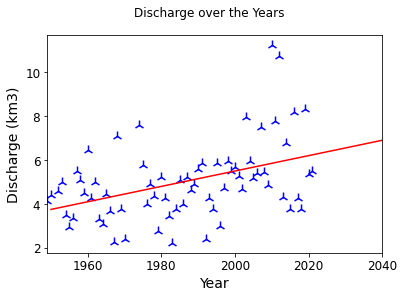

In [ ]:
fig, ax = plt.subplots()

fig.suptitle('Discharge over the Years')
ax.set_xlabel("Year")
ax.set_ylabel("Discharge (km3)")

ax.scatter(year, # X values
           discharge, # y values
           color='b', # Color
           s=100, # Marker size
           marker= '2') # Marker style


reg_x = np.linspace(1950, # Start
                        2040, # Stop
                        100   # Number of Points
                        ).reshape(-1,1) # Reshape to row=sample, col=feature

# Let's produce a set of predictions from our linear space array.  ***THIS IS WHERE THE PROBELM IS**
reg_y = lin_reg.predict(reg_x)
# Let's plot the regression line using reg_x and reg_y. Set the color to red and
# the linewidth to 1.5
ax.plot(reg_x, reg_y,# X
       color='r', # Color
       linewidth=1.5) # Linewidth

ax.autoscale(axis='x', tight=True)





In [ ]:
df_new["Year"]-2000
np.abs(df_new["Year"]-2000)
np.argmin(abs(df_new["Year"]-2000))   #this is the index of the value closest to 2000 within the column (47)
df_new.iloc[47]

Year                 2000.00
Discharge_(km3)         5.69
Uncertainty_(km3)       1.07
Data_origin             2.00
Discharge               5.69
Name: 51, dtype: float64

In [ ]:
train_X = np.asarray(df_new["Year"])[0:47]
train_y = np.asarray(df_new["Discharge"])[0:47]
print(train_X, train_y)
test_X = np.asarray(df_new["Year"])[47:]
test_y = np.asarray(df_new["Discharge"])[47:]
print(test_X,test_y)

[1949 1950 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1974 1975 1976 1977 1978 1979 1980
 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994
 1995 1996 1997 1998 1999] [4.14 4.42 4.57 5.02 3.49 2.94 3.35 5.49 5.09 4.49 6.48 4.27 4.98 3.31
 3.08 4.43 3.68 2.24 7.12 3.76 2.4  7.6  5.77 3.98 4.89 4.35 2.76 5.25
 4.29 3.43 2.22 3.77 5.11 4.01 5.22 4.64 4.89 5.6  5.85 2.41 4.28 3.75
 5.88 2.98 4.72 5.94 5.52]
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021] [ 5.69  5.26  4.69  7.96  5.96  5.17  5.4   7.51  5.46  4.85 11.24  7.77
 10.73  4.32  6.76  3.79  8.21  4.28  3.76  8.33  5.36  5.48]


In [ ]:
model = sklearn.linear_model.LinearRegression()
model.fit(train_X, train_y)

print(r2_score(train_y, model.predict(train_X)), r2_score(test_y, model.predict(test_X)))
print(mean_squared_error(train_y, model.predict(train_X)), mean_squared_error(test_y, model.predict(test_X)))

ValueError: ignored

In [ ]:
lin_reg_train = LinearRegression()
lin_reg_train.fit(train_X.reshape(-1, 1), train_y.reshape(-1,1))

LinearRegression()

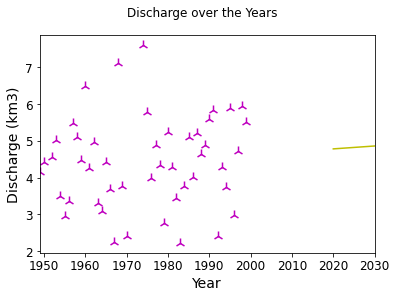

In [ ]:
fig, ax = plt.subplots()

fig.suptitle('Discharge over the Years')
ax.set_xlabel("Year")
ax.set_ylabel("Discharge (km3)")

ax.scatter(train_X, # X values
           train_y, # y values
           color='m', # Color
           s=100, # Marker size
           marker= '2') # Marker style


reg_x = np.linspace(2020, # Start
                        2030, # Stop
                        100   # Number of Points
                        ).reshape(-1,1) # Reshape to row=sample, col=feature

# Let's produce a set of predictions from our linear space array.  
reg_y = lin_reg_train.predict(reg_x)
# Let's plot the regression line using reg_x and reg_y. Set the color to red and
# the linewidth to 1.5
ax.plot(reg_x, reg_y,# X
       color='y', # Color
       linewidth=1.5) # Linewidth

ax.autoscale(axis='x', tight=True)

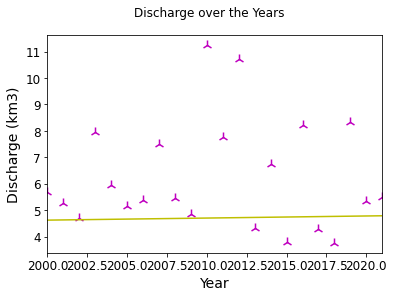

In [ ]:
fig, ax = plt.subplots()

fig.suptitle('Discharge over the Years')
ax.set_xlabel("Year")
ax.set_ylabel("Discharge (km3)")

ax.scatter(test_X, # X values
           test_y, # y values
           color='m', # Color
           s=100, # Marker size
           marker= '2') # Marker style




# Let's produce a set of predictions from our linear space array.  
reg_y = lin_reg_train.predict(test_X.reshape(-1,1))
# Let's plot the regression line using reg_x and reg_y. Set the color to red and
# the linewidth to 1.5
ax.plot(test_X, reg_y,# X
       color='y', # Color
       linewidth=1.5) # Linewidth

ax.autoscale(axis='x', tight=True)

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import tifffile 
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Watson River discharge (2006-2021) daily_1.csv to Watson River discharge (2006-2021) daily_1.csv


In [ ]:
#I'm using regression for my project
df = pd.read_csv("Watson River discharge (2006-2021) daily_1.csv")
#df['Discharge_(km3)'].replace(-999.00,np.NaN)
#df.replace(-999.00, np.nan)
#df.replace(np.NaN, 0)
print (df)

      Year  MonthOfYear  DayOfMonth  DayOfYear  DayOfCentury  \
0     2006            4          10        100          2292   
1     2006            4          11        101          2293   
2     2006            4          12        102          2294   
3     2006            4          13        103          2295   
4     2006            4          14        104          2296   
...    ...          ...         ...        ...           ...   
3211  2021           10          23        296          7967   
3212  2021           10          24        297          7968   
3213  2021           10          25        298          7969   
3214  2021           10          26        299          7970   
3215  2021           10          27        300          7971   

      WaterFluxDiversOnly(m3/s)  Uncertainty(m3/s)  \
0                        -999.0             -999.0   
1                        -999.0             -999.0   
2                        -999.0             -999.0   
3              

In [ ]:
print(df["WaterFluxDiversOnly(m3/s)"])

0      -999.0
1      -999.0
2      -999.0
3      -999.0
4      -999.0
        ...  
3211   -999.0
3212   -999.0
3213   -999.0
3214   -999.0
3215   -999.0
Name: WaterFluxDiversOnly(m3/s), Length: 3216, dtype: float64


In [ ]:
from sklearn.datasets import make_moons

In [ ]:
Year, Discharge = make_moons(n_samples=10000, noise=0.4)

In [ ]:
# Import the train_test_split function here.
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a test set
# There will be four outputs in this function. 2 for X (train and test) and 2 for y (train and test)
X_train,X_test,y_train,y_test = train_test_split(Year,Discharge, test_size=0.2, random_state=42)

In [ ]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

print(r2_score(y_train, model.predict(X_train)), r2_score(y_test, model.predict(X_test)))
print(mean_squared_error(y_train, model.predict(X_train)), mean_squared_error(y_test, model.predict(X_test)))

0.4843011686232088 0.5128813648545811
0.1289245063993418 0.121776614294885


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


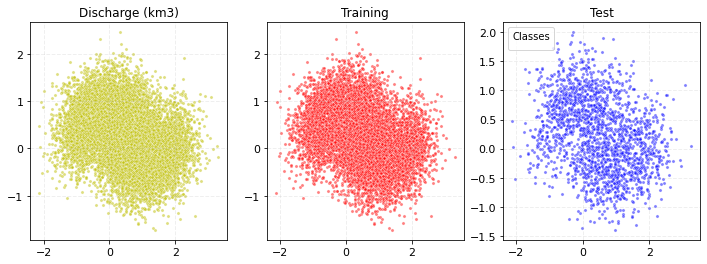

In [ ]:
# Scatter the moon data and don't forget to add a legend to your figure
import numpy as np
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,3,figsize=(12,4))
#########################################################################################################
# (1) Plot the whole dataset with plt.scatter 
#########################################################################################################
# The X and y indices of each data point can be obtained like this: X[:,0], X[:,1]
# The scatter points should be coloured by y
scatter = ax[0].scatter(Year[:,0], Year[:,1],s=10,c='y',edgecolor='w',linewidths=0.5,alpha=0.5,cmap='RdBu')
# Add legend to the upper right corner of the figure
legend1 = plt.legend(*scatter.legend_elements(),loc='upper left', title="Classes")
ax[0].set_title('Discharge (km3)')
ax[0].tick_params(axis='both', which='major', labelsize=11)
ax[0].grid(alpha=0.2,ls='--',lw=1)

#########################################################################################################
# (2) Plot the training dataset with plt.scatter 
#########################################################################################################
scatter_train = ax[1].scatter(X_train[:,0], X_train[:,1],s=10,c='r',edgecolor='w',linewidths=0.5,alpha=0.5,cmap='RdBu')
ax[1].set_title('Training')
ax[1].tick_params(axis='both', which='major', labelsize=11)
ax[1].grid(alpha=0.2,ls='--',lw=1)

#########################################################################################################
# (2) Plot the test dataset with plt.scatter 
#########################################################################################################
scatter_test = ax[2].scatter(X_test[:,0], X_test[:,1],s=10,c='b',edgecolor='w',linewidths=0.5,alpha=0.5,cmap='RdBu')
ax[2].set_title('Test')
ax[2].tick_params(axis='both', which='major', labelsize=11)
ax[2].grid(alpha=0.2,ls='--',lw=1)

plt.show()

In [ ]:
# Import the necessary classes and functions
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Conduct the grid search to find good hyperparameter values 
# for your decision tree
# For 'max_leaf_nodes', search between 2 and 120
# For 'min_samples_split', search between 2 and 10

##############################################################################################################################
# 1. Define hyperparameter search grid
##############################################################################################################################
# In param_grid, define the hyperparameters you would like to test, and the ranges the hyperparameters should be in
param_grid = {'max_leaf_nodes': np.linspace(2,120, dtype = int),'min_samples_split':[2,10]}

#############################################################################################################################
# 2. GridSearch
##############################################################################################################################
# Perform GridSearch on your DecisionTree (random_state=42 to ensure same result every time)
# use cv=3, verbose=1 for GridSearchCV()
gsc_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=3, verbose=5)

##############################################################################################################################
# 3. Fit on training set
##############################################################################################################################
gsc_tree.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END max_leaf_nodes=2, min_samples_split=2;, score=0.769 total time=   0.0s
[CV 2/3] END max_leaf_nodes=2, min_samples_split=2;, score=0.767 total time=   0.0s
[CV 3/3] END max_leaf_nodes=2, min_samples_split=2;, score=0.790 total time=   0.0s
[CV 1/3] END max_leaf_nodes=2, min_samples_split=10;, score=0.769 total time=   0.0s
[CV 2/3] END max_leaf_nodes=2, min_samples_split=10;, score=0.767 total time=   0.0s
[CV 3/3] END max_leaf_nodes=2, min_samples_split=10;, score=0.790 total time=   0.0s
[CV 1/3] END max_leaf_nodes=4, min_samples_split=2;, score=0.859 total time=   0.0s
[CV 2/3] END max_leaf_nodes=4, min_samples_split=2;, score=0.844 total time=   0.0s
[CV 3/3] END max_leaf_nodes=4, min_samples_split=2;, score=0.863 total time=   0.0s
[CV 1/3] END max_leaf_nodes=4, min_samples_split=10;, score=0.859 total time=   0.0s
[CV 2/3] END max_leaf_nodes=4, min_samples_split=10;, score=0.844 total time=   0.0s
[CV 3/3]

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': array([  2,   4,   6,   9,  11,  14,  16,  18,  21,  23,  26,  28,  30,
        33,  35,  38,  40,  42,  45,  47,  50,  52,  54,  57,  59,  62,
        64,  67,  69,  71,  74,  76,  79,  81,  83,  86,  88,  91,  93,
        95,  98, 100, 103, 105, 107, 110, 112, 115, 117, 120]),
                         'min_samples_split': [2, 10]},
             verbose=5)

In [ ]:
gsc_tree.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

In [ ]:
y_pred_train = gsc_tree.predict(X_train)
y_pred_test = gsc_tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy over training set: {(accuracy_score(y_train,y_pred_train)):.2%} \n' 
f'Accuracy over test set: {(accuracy_score(y_test,y_pred_test)):.2%}')

Accuracy over training set: 85.82% 
Accuracy over test set: 86.20%


In [ ]:
corr_X,wrong_X = [],[]
for indx,obj in enumerate(y_pred_test): # Pull out predictions on each data points one-by-one
  if  obj != y_test[indx,]: # If the predictions is not equal to output truth (y_test)
    wrong_X.append(indx) # Model made an error
  else:
    corr_X.append(indx) # Model correct prediction

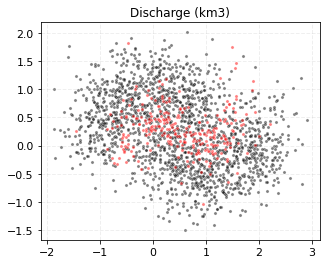

In [ ]:
# Recycle the visualization scripts earlier 
fig,ax = plt.subplots(1,1,figsize=(5,4))
##############################################################################################################################
# 1. Plot correct prediction here
##############################################################################################################################
scatter_corr = ax.scatter(X_test[corr_X, 0], X_test[corr_X,1],s=10,color='k',edgecolor='w',linewidths=0.5,alpha=0.5)
##############################################################################################################################
# 2. Plot wrong prediction here
##############################################################################################################################
scatter_wrong = ax.scatter(X_test[wrong_X, 0], X_test[wrong_X,1],s=10,color='r',edgecolor='w',linewidths=0.5,alpha=0.5)
##############################################################################################################################
# 3. Title etc.
##############################################################################################################################
ax.set_title('Discharge (km3)')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.grid(alpha=0.2,ls='--',lw=1)
plt.show()